In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter06/UCI_Credit_Card.csv")
# credit card data
%matplotlib inline

ATTRIBUTES DESCRIPTION- 

There are 25 variables:


* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE:Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
data.shape

(30000, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [7]:
data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

In [8]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# Drop ID -- not needed
data = data.drop('ID', axis=1)

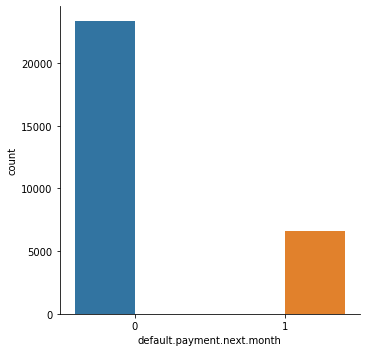

In [11]:
import seaborn as sns
sns.catplot('default.payment.next.month', data=data, \
              kind='count', hue='default.payment.next.month', \
              aspect=1.00)

# hue: 根据default.payment.next.month将不同的柱分组为不同的颜色
# change kind可以绘制不同的图-box, swarm, bar, 默认是散点图

### Checking data unbalance

In [14]:
data['default.payment.next.month'].value_counts() * 100 / len(data)

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

### Finding the number of distinct value in each column

In [93]:
data.apply(lambda x: len(x.unique()))

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         5
MARRIAGE                          3
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125af2518>,
      dtype=object)

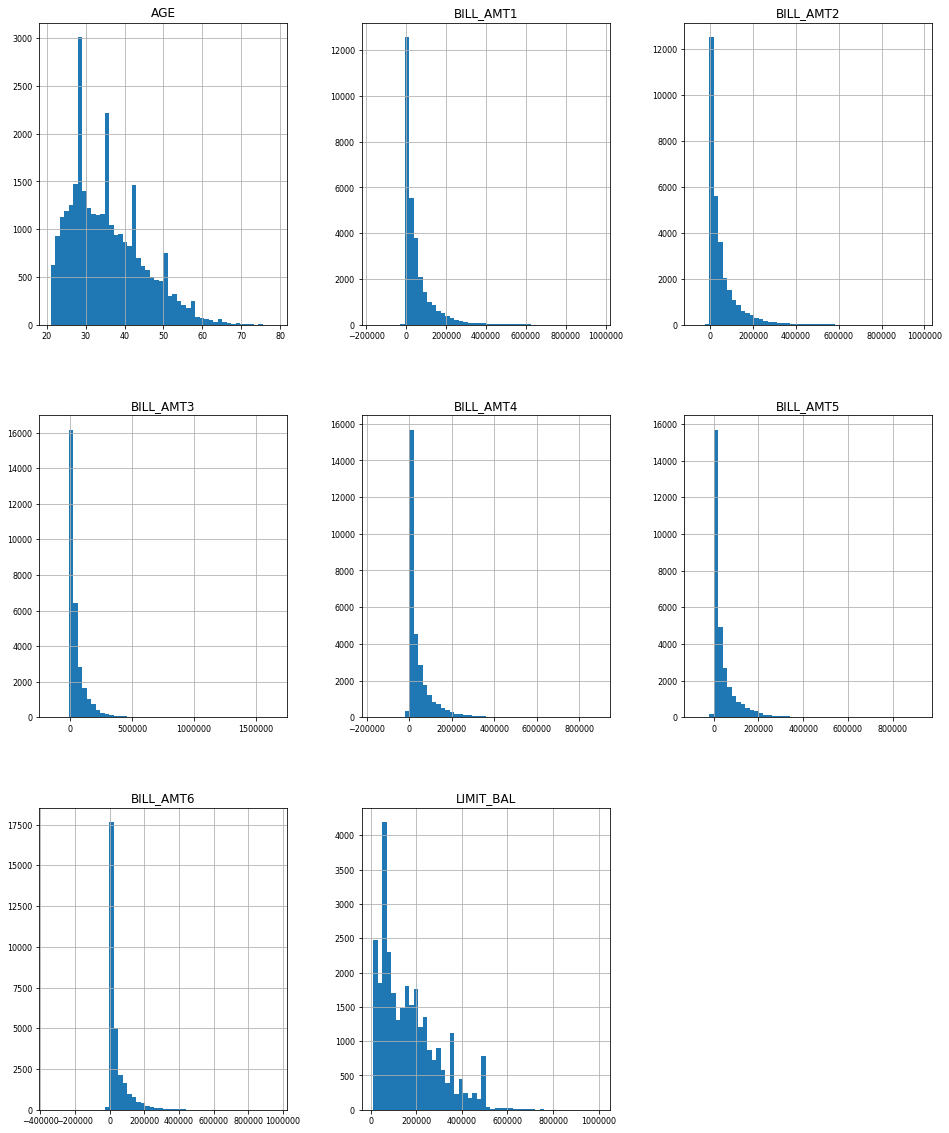

In [20]:
selected_columns = data[['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'LIMIT_BAL']]
#
selected_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [23]:
# group default vs gender
data.groupby(['default.payment.next.month', 'SEX']).mean()

LIMIT_BAL  EDUCATION  MARRIAGE        AGE  \
default.payment.next.month SEX                                                  
0                          1    175510.371603   1.823405  1.581032  36.428619   
                           2    179726.531466   1.852603  1.544568  34.781866   
1                          1    125895.468152   1.888966  1.544031  36.804386   
                           2    133327.132607   1.899017  1.515812  34.902206   

                                   PAY_0     PAY_2     PAY_3     PAY_4  \
default.payment.next.month SEX                                           
0                          1   -0.149639 -0.214975 -0.243039 -0.288186   
                           2   -0.249913 -0.356541 -0.362255 -0.398007   
1                          1    0.731291  0.553777  0.478942  0.350505   
                           2    0.619984  0.385331  0.272921  0.181238   

                                   PAY_5     PAY_6  ...     BILL_AMT3  \
default.payment.next.month SEX                      ...                 
0                          1   -0.334221 -0.362618  ...  49928.660677   
                           2   -0.424211 -0.432643  ...  46028.481288   
1                          1    0.265924  0.191786  ...  46564.879220   
                           2    0.093011  0.051289  ...  44125.482859   

                                   BILL_AMT4     BILL_AMT5     BILL_AMT6  \
default.payment.next.month SEX                                             
0                          1    45609.505380  41884.436273  40307.988464   
                           2    42355.674542  39679.777824  38247.059029   
1                          1    43088.842673  40655.783502  39454.712496   
                           2    41233.845070  38688.450173  37368.019399   

                                   PAY_AMT1     PAY_AMT2     PAY_AMT3  \
default.payment.next.month SEX                                          
0                          1    6382.709040  6779.172158  5986.422740   
                           2    6259.983832  6553.320022  5607.157223   
1                          1    3427.584058  3392.552732  3611.650191   
                           2    3373.727345  3385.669678  3180.832846   

                                   PAY_AMT4     PAY_AMT5     PAY_AMT6  
default.payment.next.month SEX                                         
0                          1    5374.956184  5347.230727  5821.985358  
                           2    5253.769392  5186.015332  5654.903059  
1                          1    3282.129481  3210.437522  3563.602158  
                           2    3059.043582  3225.783417  3348.245017  

[4 rows x 22 columns]

Text(0, 0.5, '# Payment Defaults')

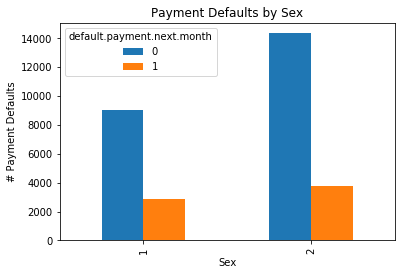

In [25]:
pandas 交叉透视表
pd.crosstab(data.SEX, data['default.payment.next.month']).plot(kind='bar', stacked=False)
plt.title('Payment Defaults by Sex')
plt.xlabel('Sex')
plt.ylabel('# Payment Defaults')

Text(0, 0.5, '# payment default')

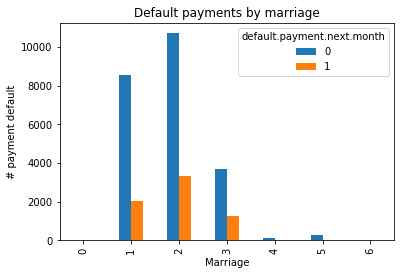

In [31]:
pd.crosstab(data.EDUCATION, data['default.payment.next.month']).plot(kind='bar')
plt.title('Default payments by marriage')
plt.xlabel('Marriage')
plt.ylabel('# payment default')

Explore the payment defaults by age group.

In [32]:
data['agegroup'] = pd.cut(data['AGE'], range(0, 100, 10), right=False)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,agegroup
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"[20, 30)"
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"[20, 30)"
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"[30, 40)"
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"[30, 40)"
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"[50, 60)"


Plot the number of defaults per age group

In [33]:
pd.crosstab(data.agegroup, data['default.payment.next.month'])

default.payment.next.month,0,1
agegroup,,
"[20, 30)",7421,2197
"[30, 40)",8962,2276
"[40, 50)",4979,1485
"[50, 60)",1759,582
"[60, 70)",225,89
"[70, 80)",18,7


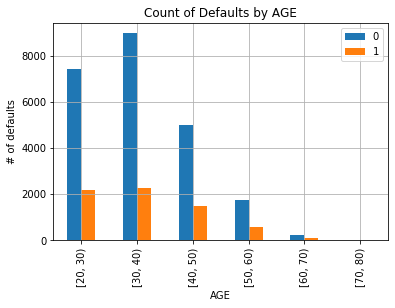

In [15]:
pd.crosstab(data.agegroup, data['default.payment.next.month']).plot(kind='bar', stacked=False, grid=True)
plt.title('Count of Defaults by AGE')
plt.xlabel('AGE')
plt.ylabel('# of defaults')
plt.legend()

Drop agegroup after this analysis

In [34]:
data = data.drop(columns=['agegroup'])
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Assigning the labels to make interpretation easier

In [43]:
gendermap = {2:'female', 1:'male'}
marriageMap = {1:"married", 2:'single', 3:'other', 0:'other'}
educationMap = {1:'graduate school', 2:'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown', 0:'unknown'}


In [44]:
data['SEX'] = data.SEX.map(gendermap)
data['MARRIAGE'] = data.MARRIAGE.map(marriageMap)
data['EDUCATION'] = data.EDUCATION.map(educationMap)
data['PAY_0'] = data['PAY_0'].astype(str)
data['PAY_2'] = data['PAY_2'].astype(str) 
data['PAY_3'] = data['PAY_3'].astype(str) 
data['PAY_4'] = data['PAY_4'].astype(str) 
data['PAY_5'] = data['PAY_5'].astype(str) 
data['PAY_6'] = data['PAY_6'].astype(str) 
data.dtypes


ID                              int64
LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                             int64
PAY_0                          object
PAY_2                          object
PAY_3                          object
PAY_4                          object
PAY_5                          object
PAY_6                          object
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [45]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [94]:
predictor = data.iloc[:, data.columns != 'default.payment.next.month']
target = data.iloc[:, data.columns == 'default.payment.next.month']

In [95]:
predictor.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

seperate numerical features and nonnunmerical features (or use numpy imputer) This will not be used in this example - just put for future work

In [48]:
categorical_columns = [col for col in predictor.columns.values if predictor[col].dtype == 'object']
data_categorical = predictor[categorical_columns]
data_numerical = predictor.drop(categorical_columns, axis=1)

Dummy code the categorical data

In [49]:
dummy_code_cat_vars = pd.get_dummies(data_categorical, drop_first=True)

Concatenate the nummy code variables to our dataframe

In [61]:
df_predictor = pd.concat([data_numerical, dummy_code_cat_vars], axis=1)
df_predictor.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
df_predictor.shape

(30000, 80)

Split data into training and testing

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_predictor, target, test_size=0.3, random_state=0)
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("Y_train ", Y_train.shape)
print("Y_test ", Y_test.shape)

X_train  (21000, 80)
X_test  (9000, 80)
Y_train  (21000, 1)
Y_test  (9000, 1)


Scale the freatures with standardScaler()

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

In [68]:
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values

In [69]:
X_train = X_train_scaled
X_test = X_test_scaled

In [77]:
Y_train.values.ravel()

array([0, 0, 0, ..., 0, 0, 0])

### Model building

In [99]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0, n_estimators=100,\
                                   criterion='entropy', max_leaf_nodes=20, oob_score=True, n_jobs=-1)
model_RF = classifier.fit(X_train, Y_train.values.ravel())

In [100]:
# train accuracy
acc_random_forest = classifier.score(X_train, Y_train)*100
print(round(acc_random_forest,2), '%')

81.42 %


In [101]:
acc_random_forest = classifier.score(X_test, Y_test)*100
print(round(acc_random_forest,2), '%')

81.6 %


### ROC Curve & AUC

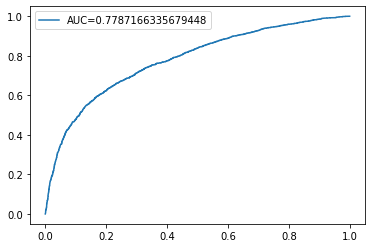

In [106]:
from sklearn import metrics
y_prob_proba = model_RF.predict_proba(X_test)[:, 1] # predict class probabilities for X_test
# probability of label 1
fpr, tpr, _ = metrics.roc_curve(Y_test, y_prob_proba)
auc = metrics.roc_auc_score(Y_test, y_prob_proba)
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.legend()
plt.show()

In [91]:
y_prob_proba

array([[0.45144464, 0.54855536],
       [0.73190544, 0.26809456],
       [0.80079241, 0.19920759],
       ...,
       [0.86933415, 0.13066585],
       [0.85285788, 0.14714212],
       [0.88326644, 0.11673356]])

In [107]:
# predict the model
y_pred_RF = model_RF.predict(X_test)

# Evaluate
evaluation_scores = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(Y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(Y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(Y_test, y_pred_RF),
                 'Accuracy Score': metrics.accuracy_score(Y_test, y_pred_RF),
                 'Kappa Score':metrics.cohen_kappa_score(Y_test, y_pred_RF)})

print(evaluation_scores)

Model               Random Forest Classifier 
ROC Score                            0.618802
Precision Score                      0.683938
Recall Score                         0.272165
Accuracy Score                          0.816
Kappa Score                          0.303963
dtype: object


In [109]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      7060
           1       0.68      0.27      0.39      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.62      0.64      9000
weighted avg       0.80      0.82      0.78      9000



## What does those score mean? 

### feature importance